# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,}'.format)

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv")
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [3]:
df.keys()

Index(['Beer', 'Brewery', 'Location', 'Style', 'Size', 'ABV', 'IBUs'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.3+ KB


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [5]:
df.groupby("Brewery").Beer.value_counts().sort_values(ascending=False).head(10)

Brewery                         Beer                                  
Hopworks Urban Brewery          Nonstop Hef Hop                           12
Kona Brewing Company            Longboard Island Lager                     4
Oskar Blues Brewery             Dale's Pale Ale                            4
Boston Beer Company             Boston Lager                               3
Blue Blood Brewing Company      1327 Pod's ESB                             3
Sockeye Brewing Company         Dagger Falls IPA                           3
Great Northern Brewing Company  Black Star Double Hopped Golden Lager      2
Wachusett Brewing Company       Green Monsta IPA                           2
New Belgium Brewing Company     Fat Tire Amber Ale                         2
                                Ranger IPA                                 2
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [6]:
df.ABV.value_counts().sort_values(ascending=False).head(1)

ABV
5.00%    215
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
df.ABV = df.ABV.str.replace("%", "")

In [9]:
df.ABV = df.ABV.astype(float)

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [10]:
df.ABV.mean()

5.977342419080068

In [11]:
df.ABV.median()

5.6

<Axes: >

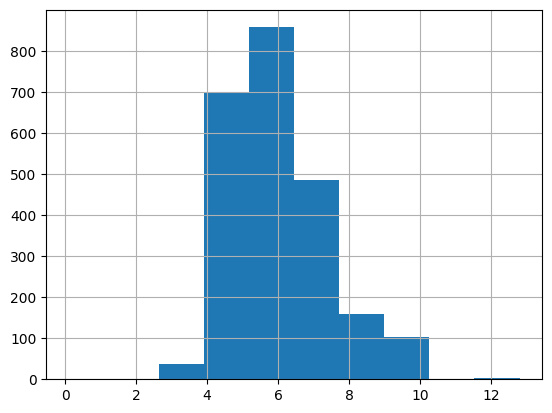

In [12]:
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [13]:
df.ABV.isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [14]:
df.Location.value_counts().sort_values(ascending=False).head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [15]:
df[df.Location == "Brooklyn, NY"].Beer

115                              4Beans
210                              Jammer
246                             Abigale
404                       Nomader Weiss
421                                 Rad
439                        Molotov Lite
588                             Bengali
713                       Sensi Harvest
969                              Hi-Res
987               KelSo Nut Brown Lager
1057                      Global Warmer
1074                 Autumnation (2013)
1093               KelSo India Pale Ale
1267                          The Crisp
1268                       Sweet Action
1269                      Righteous Ale
1270                      Bengali Tiger
1305                      KelSo Pilsner
1365    Hipster Ale (Two Roads Brewing)
1366                        Bikini Beer
1373                East India Pale Ale
1624                             3Beans
1836                         Brownstone
1857                Brooklyn Summer Ale
1962    Hipster Ale (Westbrook Brewing)


## What brewery in Brooklyn puts out the most different cans of beer?

In [16]:
Brooklyn = df[df.Location == "Brooklyn, NY"]
Brooklyn

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


In [17]:
Brooklyn.groupby("Brewery").Beer.nunique().sort_values(ascending=False)

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        5
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Beer, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [18]:
df[df.Brewery == "Sixpoint Craft Ales"].Style.value_counts().sort_values(ascending=False).head(5)

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [19]:
NY = df[df.Location.str[-2:]=="NY"]

In [20]:
NY.Brewery.unique()

array(['Sixpoint Craft Ales', 'Evil Twin Brewing', 'Chatham Brewing',
       'Newburgh Brewing Company', 'Southampton Publick House',
       'Montauk Brewing Company', 'Matt Brewing Company',
       'The Bronx Brewery', 'KelSo Beer Company', 'Brooklyn Brewery',
       'The Manhattan Brewing Company', 'Blue Point Brewing Company',
       'Bomb Beer Company', 'Dundee Brewing Company',
       'Upstate Brewing Company', 'Butternuts Beer and Ale'], dtype=object)

### Now *count* all of the breweries in New York state

In [21]:
NY.Brewery.nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [22]:
df[df.Style.str.contains("IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [23]:
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.0,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85


### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [24]:
df = pd.read_csv("craftcans.csv", na_values=["NA", "N/A", "-", "", "Does not apply"])

In [25]:
df[df.IBUs=="NA"]

,Beer,Brewery,Location,Style,Size,ABV,IBUs


In [26]:
filtered = df.dropna(subset=['IBUs'])
filtered.IBUs.astype(int)

0        50
1        26
2        19
3        38
4        25
       ... 
2411     35
2412    100
2413     35
2414     85
2415     65
Name: IBUs, Length: 1405, dtype: int64

In [27]:
filtered.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

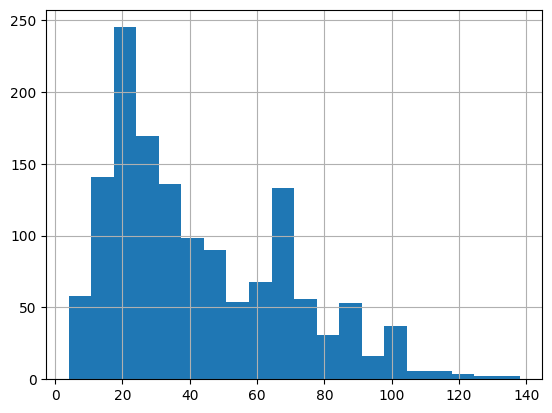

In [28]:
filtered.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [29]:
df.IBUs.quantile(0.75)

64.0

In [30]:
above75 = df[df.IBUs > 64.0]

In [31]:
above75.Beer.unique()

array(['Citra Ass Down', 'London Balling', 'Rico Sauvin', 'Pile of Face',
       'Excess IPL', 'Hoponius Union', 'Habitus (2014)', 'Solis',
       'Habitus', 'Yeti Imperial Stout',
       "98 Problems (Cuz A Hop Ain't One)", 'Train Hopper', 'Csar',
       'Saucy Intruder', 'The Gadget', 'Gone A-Rye', 'Heavy Lifting',
       'Jah Mon', 'Flying Mouse 4', 'Soul Doubt', 'Bimini Twist',
       'Long Leaf', 'Double Duckpin', 'Hop A-Peel', 'Wobble',
       'Hopkick Dropkick', 'Union Jack', 'India Pale Ale', 'Self Starter',
       'Nugget Nectar', 'Mission IPA', 'Bay of Bengal Double IPA (2014)',
       'Newport Storm IPA', 'Clean Shave IPA', 'Big Star White IPA',
       'Firestarter India Pale Ale', 'Back Bay IPA', '4000 Footer IPA',
       'Unchained #18 Hop Silo', 'Harness the Winter', 'Rule G IPA',
       'Yellow Wolf Imperial IPA', 'Third Eye Enlightened Pale Ale',
       'The Green Room', '2014 IPA Cicada Series',
       'Sinister Minister Black IPA', 'O’Malley’s IPA',
       'Perpetual 

## List all of the beers with IBUs below the 25th percentile

In [32]:
df.IBUs.quantile(.25)

21.0

In [33]:
below25 = df[df.IBUs < 21]
below25.Beer.unique()

array(["Wall's End", "Sho'nuff", 'Bloody Show', 'The Brown Note',
       'House Lager', 'Leisure Time', 'Park', 'Westfalia', 'KSA',
       'Sparkle', 'Hotbox Brown', 'Gold', 'Cafe Leche',
       'Damascene Apricot Sour', 'Sex Panther', 'Vanilla Porter', 'Gose',
       'Vermont Pilsner', 'Ginger Peach Saison', 'Weissenheimer',
       'Passion Fruit Prussia', 'Send Help', 'Daft Funk',
       'Bat Outta Helles', 'Rye Wit', 'Yo Soy Un Berliner',
       "Farmer's Daughter Blonde", 'Honey Rye', 'Honey Badger Blonde',
       'Old Pro', 'Vanilla Java Porter', 'Saddle Bronc Brown Ale',
       'Bomber Mountain Amber Ale', 'Jammer', 'Blackberry Wheat',
       'Rhode Island Blueberry', 'Watermelon Ale',
       'Bunker Hill Blueberry Ale', 'Deception', 'P-Town Pilsner',
       'Nonstop Hef Hop', 'Laka Laka Pineapple', 'Blood Orange Honey',
       'Mr. Blue Sky', 'Weisse Versa (2012)', '18th Anniversary Gose',
       'Point Special (Current)', 'Point Special',
       'Morning Wood Wheat (Current)', 

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

<Axes: xlabel='Beer'>

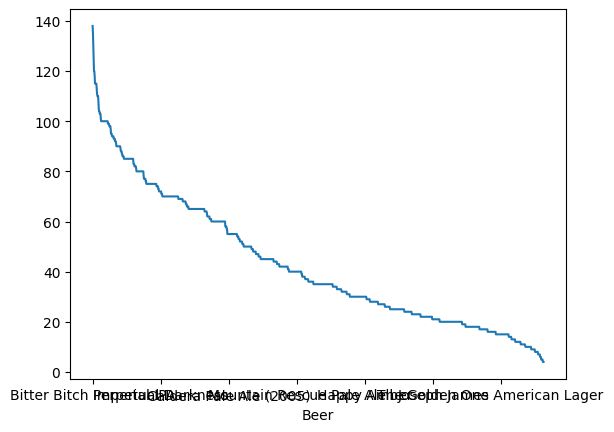

In [34]:
df.groupby("Beer").IBUs.median().sort_values(ascending=False, na_position="last").plot()

In [35]:
df.groupby("Beer").IBUs.median().sort_values(ascending=False, na_position="last")

Beer
Bitter Bitch Imperial IPA                138.0
Troopers Alley IPA                       135.0
Dead-Eye DIPA                            130.0
Bay of Bengal Double IPA (2014)          126.0
Abrasive Ale                             120.0
                                          ... 
Yunkin' Punkin'                            NaN
Zaison                                     NaN
Zaison (2012)                              NaN
oSKAr the G'Rauch                          NaN
the Kimmie, the Yink and the Holy Gose     NaN
Name: IBUs, Length: 2306, dtype: float64

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [36]:
highIBU = filtered.sort_values('IBUs', ascending=False).head(200)

In [37]:
highIBU.Style.value_counts().sort_values(ascending=False).head(5)

Style
American IPA                      92
American Double / Imperial IPA    69
American Black Ale                10
Russian Imperial Stout             7
American Amber / Red Ale           6
Name: count, dtype: int64

In [38]:
lowIBU = filtered.sort_values('IBUs', ascending=True).head(200)

In [39]:
lowIBU.Style.value_counts().sort_values(ascending=False).head(5)

Style
Fruit / Vegetable Beer     21
American Pale Wheat Ale    21
Hefeweizen                 19
American Blonde Ale        16
Witbier                    15
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [40]:
WHA = df[(df.Style == "Witbier") | (df.Style =="Hefeweizen") | (df.Style == "American Pale Wheat Ale")]

In [41]:
WHA.IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

<Axes: >

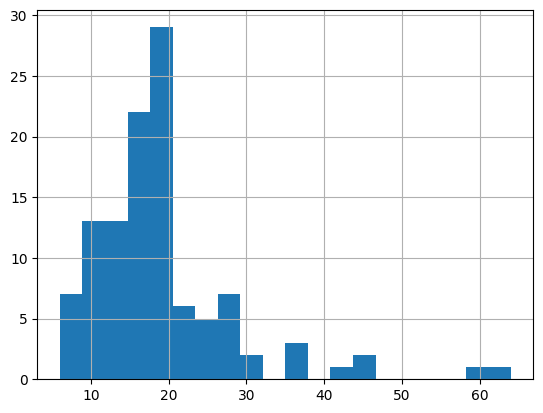

In [42]:
WHA.IBUs.hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [43]:
IPA = df[df.Style.str.contains("IPA", na=False)]
IPA

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00%,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.70%,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.20%,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00%,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100.0


In [44]:
IPA.IBUs.mean()

71.94897959183673

<Axes: >

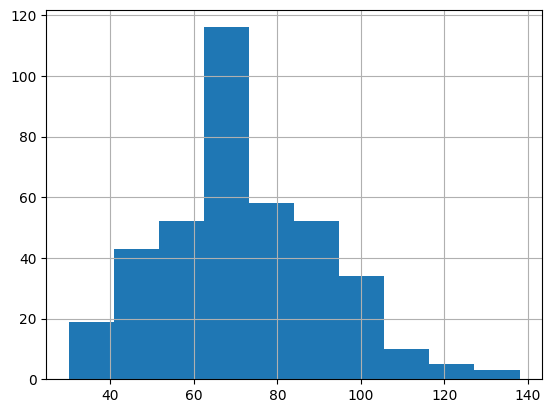

In [45]:
IPA.IBUs.hist()


## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

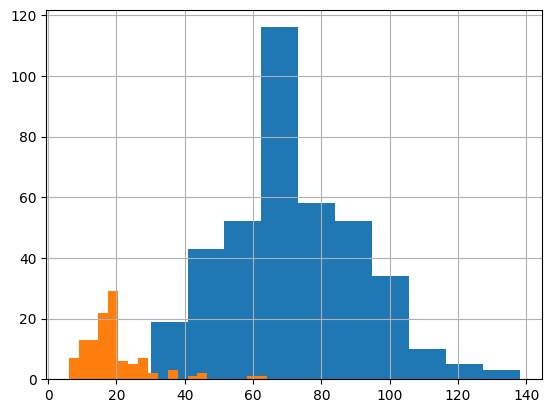

In [46]:
IPA.IBUs.hist()
WHA.IBUs.hist(bins=20)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [47]:
df.ABV = df['ABV'].str.replace("%", "")

In [48]:
df.ABV = df['ABV'].astype(float)

In [54]:
IPA = df[df.Style.str.contains("IPA", na=False)]

In [55]:
WHA = df[(df.Style == "Witbier") | (df.Style =="Hefeweizen") | (df.Style == "American Pale Wheat Ale")]

<Axes: >

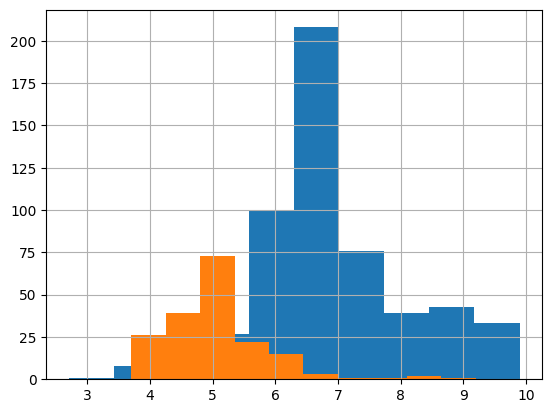

In [60]:
IPA.ABV.hist()
WHA.ABV.hist()

## Good work!